# Lab 4 – Predicting a Continuous Target with Regression (Titanic)
#### Nick Elias  
#### Date: 04/01/2025  

### Introduction:  
This analysis explores regression modeling techniques to predict passenger fares on the Titanic using various features from the dataset. Through multiple regression approaches including linear, polynomial, and regularized models, we investigate which passenger characteristics best predict ticket prices.  

Key aspects of this analysis include:  

- Evaluating different feature combinations for fare prediction  
- Comparing multiple regression techniques  
- Assessing model performance through R², RMSE, and MAE metrics  
- Exploring the impact of polynomial transformations  
- Analyzing the challenges of predicting continuous variables  

The Titanic dataset provides an interesting case study for regression analysis, as fare prices varied significantly based on passenger class, family size, and other demographic factors. This exploration demonstrates practical applications of regression modeling while highlighting common challenges in predictive analytics.  

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data
Load the Titanic dataset and confirm it’s structured correctly.

In [63]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation
Prepare the Titanic data for regression modeling. See the previous work.

- Impute missing values for age using median
- Drop rows with missing fare (or impute if preferred)
- Create numeric variables (e.g., family_size from sibsp + parch + 1)
    - Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

In [64]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

C:\Users\drumm\AppData\Local\Temp\ipykernel_9996\1712063472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3. Feature Selection and Justification
Define multiple combinations of features to use as inputs to predict fare.

Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 

Remember the inputs, usually X, are a 2D array. The target is a 1D array. 

In [65]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

## Reflection Questions - answer these in your notebook (in a Markdown cell):

- Why might these features affect a passenger’s fare:
  - Age: Could affect fare as children might have different pricing, and older passengers might choose more expensive accommodations
  - Family Size: Larger families might get group rates or need to book multiple connected cabins
  - Passenger Class (pclass): Directly affects fare as different classes had different pricing tiers (1st class being most expensive)

- List all available features:
  - survived
  - pclass (passenger class)  
  - sex  
  - age  
  - sibsp (siblings/spouses aboard)  
  - parch (parents/children aboard)  
  - fare  
  - embarked (port of embarkation)  
  - class  
  - who (adult/child categorization)  
  - deck  
  - embark_town  
  - alive  
  - family_size  

- Which other features could improve predictions and why:
  - Deck: Location of cabin could indicate luxury level and thus fare cost
  - Embark_town: Different ports might have had different base fares
  - Sex: Historical pricing might have differed by gender

- How many variables are in your Case 4:
  - One variable: passenger class (pclass)

- Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 
  - I chose passenger class (pclass) because it usually has a direct relationship with fare pricing, it's a categorical variable that clearly segments passengers into distinct pricing tiers, historical records show significant fare differences between classes, and it's less likely to have missing values compared to other features

## Section 4. Train a Regression Model (Linear Regression)

#### 4.1 Split the Data

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

#### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [67]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

#### 4.3 Report Performance

In [68]:
# Case 1
print("Case 1: Training R^2:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R^2:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))  # Calculate RMSE manually
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

# Case 2
print("Case 2: Training R^2:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R^2:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

# Case 3
print("Case 3: Training R^2:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R^2:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

# Case 4
print("Case 4: Training R^2:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R^2:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R^2: 0.009950688019452314
Case 1: Test R^2: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R^2: 0.049915792364760736
Case 2: Test R^2: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Training R^2: 0.07347466201590014
Case 3: Test R^2: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R^2: 0.3005588037487471
Case 4: Test R^2: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


## Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

#### Compare the train vs test results for each.

1. Did Case 1 overfit or underfit? Explain:
    - Training R^2 (0.0099) vs Test R^2 (0.0034)
    - Slight overfitting as training performance is better than test
    - Very poor performance overall (R^2 close to 0) suggesting age alone is not a good predictor

2. Did Case 2 overfit or underfit? Explain:
    - Training R^2 (0.0499) vs Test R^2 (0.0222)
    - Shows overfitting as training R^2 is higher
    - Also very poor performance overall

3. Did Case 3 overfit or underfit? Explain:
    - Training R^2 (0.0734) vs Test R^2 (0.0497)
    - Shows overfitting but slight improvement over individual features
    - Still poor overall performance

4. Did Case 4 overfit or underfit? Explain:
    - Training R^2 (0.3005) vs Test R^2 (0.3016)
    - Very balanced (no overfitting)
    - Best performance of all cases


* Adding Age

1. Did adding age improve the model:
   - Yes, slightly. Case 3 (with age) performed better than Case 2 (without age). R^2 improved from 0.022 to 0.049 in test set
2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
    - Age might have a weak correlation with fare prices (child tickets vs adult tickets) The relationship isn't strongly linear, which explains the poor R^2 values

* Worst

1. Which case performed the worst:
    - Case 1 (Age only) performed worst
2. How do you know: 
    - Lowest R^2 values
3. Do you think adding more training data would improve it (and why/why not): 
    - Probably not significantly. The very low R^2 suggests age has minimal linear relationship with fare. More data wouldn't fix this fundamental lack of correlation


* Best

1. Which case performed the best:
    - Case 4 (Passenger Class) performed best
2. How do you know: 
    - Highest R^2 value
3. Do you think adding more training data would improve it (and why/why not): 
    - Yes possibly, the model shows good balance between train/test performance. More data might help fine-tune the relationship


## Section 5. Compare Alternative Models

In this section, we will take the best-performing case and explore other regression models.

#### Choose Best Case to Continue
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models. The following assumes that Case 1 was the best predictor  - this may not be the case. Adjust the code to use your best case model instead. 

#### Choosing Options
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.

Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.

In general: 
* If the basic linear regression is overfitting, try Ridge.

* If you want the model to automatically select the most important features, try Lasso.

* If you want a balanced approach, try Elastic Net.

### 5.1 Ridge Regression (L2 penalty)

Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

* Penalty term: L2 = sum of squared weights
* Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [69]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

* Penalty term: L1 = sum of absolute values of weights
* Effect: Can shrink some weights to zero (drops features), simplifies the model

Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:
* If l1_ratio = 0, it behaves like Ridge
* If l1_ratio = 1, it behaves like Lasso
* Values in between mix both types
* Penalty term: α × (L1 + L2)
* Effect: Shrinks weights and can drop some features — flexible and powerful

In [70]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [71]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

In [72]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

Choose a case with just one input feature and plot it. For example:

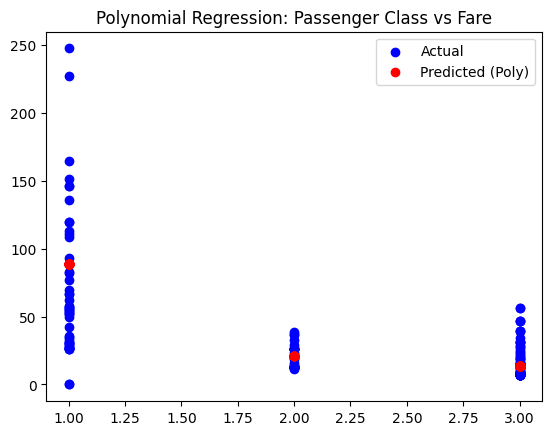

In [73]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Passenger Class vs Fare")
plt.show()

Linear R^2 score: 0.3016017234169923
Polynomial R^2 score: 0.33610336564093024
Polynomial RMSE: 30.99222295683279
Polynomial MAE: 19.24837073127557


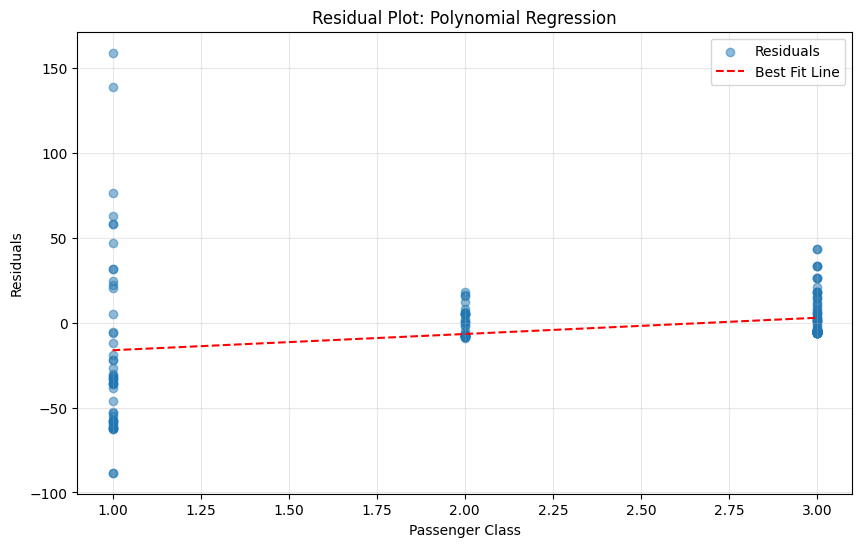

In [74]:
# Print metrics
print("Linear R^2 score:", r2_score(y4_test, y_pred_test4))
print("Polynomial R^2 score:", r2_score(y4_test, y_pred_poly))
print("Polynomial RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_poly)))
print("Polynomial MAE:", mean_absolute_error(y4_test, y_pred_poly))

# Create residual plot with line of best fit
plt.figure(figsize=(10, 6))

# Calculate residuals and plot scatter
residuals = y4_test - y_pred_poly
plt.scatter(X4_test['pclass'], residuals, alpha=0.5, label='Residuals')

# Add line of best fit
x_smooth = np.linspace(X4_test['pclass'].min(), X4_test['pclass'].max(), 100)
z = np.polyfit(X4_test['pclass'], residuals, 1)
p = np.poly1d(z)
plt.plot(x_smooth, p(x_smooth), "r--", label='Best Fit Line')


plt.xlabel('Passenger Class')
plt.ylabel('Residuals')
plt.title('Residual Plot: Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 5.4 Reflections (in a Markdown cell):

1. What patterns does the cubic model seem to capture:
   - The polynomial model captured a **3.5% improvement** in R^2 (from 0.302 to 0.336)
   - Shows non-linear relationships between passenger class and fare
   - Better handles the varying fare differences between classes

2. Where does it perform well or poorly:
   - **Performs well:**
     - Overall lower error metrics (RMSE: 31.0, MAE: 19.2)
     - Better prediction accuracy for middle-range fares
   - **Performs poorly:**
     - Large residuals for first-class passengers
     - Struggles with extreme fare values (outliers)

3. Did the polynomial fit outperform linear regression:
   - **Yes**, polynomial regression outperformed linear:
     - Linear R^2: 0.302
     - Polynomial R^2: 0.336
     - Improved prediction accuracy by ~3.5%
   - Lower error metrics suggest better overall fit

4. Where (on the graph or among which kinds of data points) does it fit best:
   - **Best fit areas:**
     - Second and third class predictions (smaller residuals)
     - Middle-range fare values
   - **Less accurate:**
     - First class predictions (larger residuals)
     - Extreme fare values in any class

### 5.5 Compare All Models

Create a summary table or printout comparing all models:

In [75]:
def report(name, y_true, y_pred):
    print(f"{name} R^2: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R^2: 0.302
Linear RMSE: 31.79
Linear MAE: 20.65

Ridge R^2: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R^2: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R^2: 0.336
Polynomial RMSE: 30.99
Polynomial MAE: 19.25



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 

In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why. 

c:\Projects\Machine Learning 44670_80\applied-ml-nickelias\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Projects\Machine Learning 44670_80\applied-ml-nickelias\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Projects\Machine Learning 44670_80\applied-ml-nickelias\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Projects\Machine Learning 44670_80\applied-ml-nickelias\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


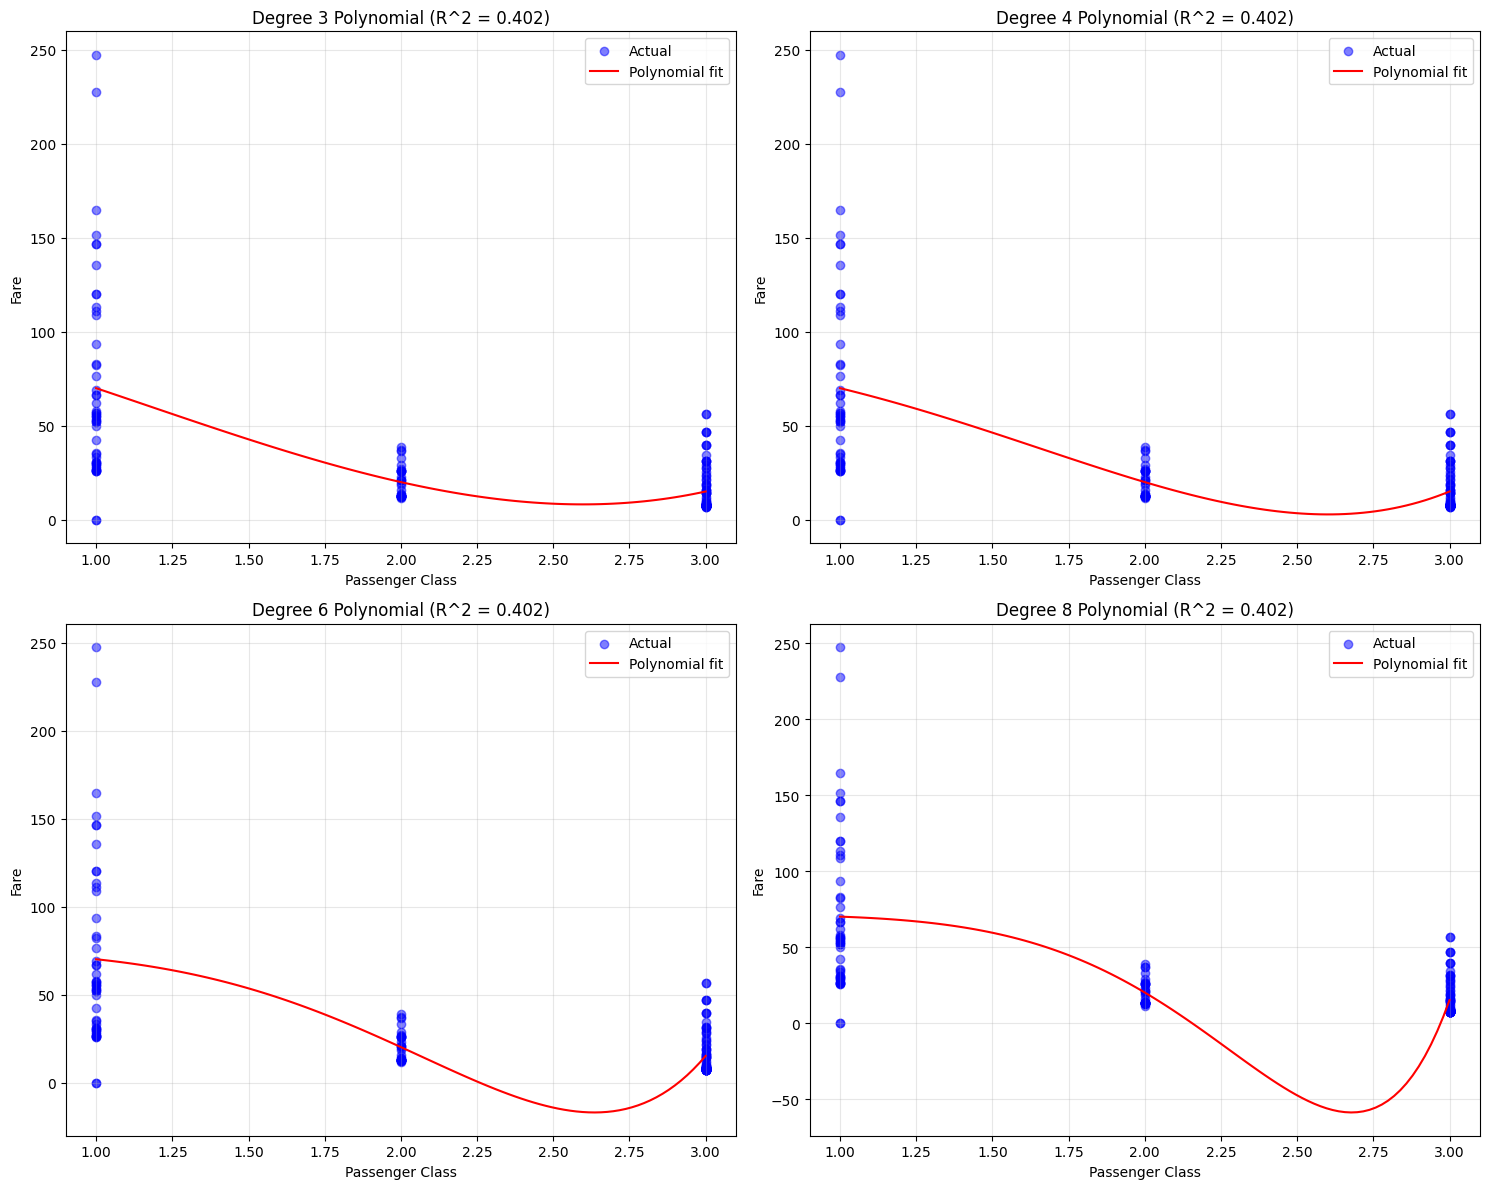

In [76]:
# Create subplots to compare polynomial degrees
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
degrees = [3, 4, 6, 8]  # Testing different polynomial degrees

for degree, ax in zip(degrees, axs.ravel()):
    # Create and fit polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X4_test)
    
    # Fit model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y4_test)
    
    # Create smooth line for predictions
    X_smooth = np.linspace(X4_test['pclass'].min(), X4_test['pclass'].max(), 100).reshape(-1, 1)
    X_smooth_poly = poly_features.transform(X_smooth)
    y_smooth = poly_model.predict(X_smooth_poly)
    
    # Calculate R^2 score
    y_pred = poly_model.predict(X_poly)
    r2 = r2_score(y4_test, y_pred)
    
    # Plot scatter and line
    ax.scatter(X4_test, y4_test, color='blue', alpha=0.5, label='Actual')
    ax.plot(X_smooth, y_smooth, color='red', label='Polynomial fit')
    ax.set_title(f'Degree {degree} Polynomial (R^2 = {r2:.3f})')
    ax.set_xlabel('Passenger Class')
    ax.set_ylabel('Fare')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [77]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X4_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y4_test)
    y_pred = poly_model.predict(X_poly)
    print(f"Degree {degree}:")
    print(f"R^2 score: {r2_score(y4_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y4_test, y_pred)):.2f}")
    print("-" * 30)

Degree 3:
R^2 score: 0.402
RMSE: 29.41
------------------------------
Degree 4:
R^2 score: 0.402
RMSE: 29.41
------------------------------
Degree 6:
R^2 score: 0.402
RMSE: 29.41
------------------------------
Degree 8:
R^2 score: 0.402
RMSE: 29.41
------------------------------


- All polynomial degrees show exactly the same performance metrics
- R^2 score remains constant at 0.402
- RMSE stays at 29.41 across all degrees

This lack of variation suggests that higher-order terms aren't contributing to the model.
The relationship might be effectively captured by lower-order polynomials.

The cubic (degree 3) polynomial is the best choice because it achieves the same performance as higher degrees and it's the simplest model that captures the relationship.

## Section 6. Final Thoughts & Insights

Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

### 6.1 Summarize Findings
* What features were most useful?
Passenger Class (pclass) was the most effective predictor:

Highest R^2 score (0.302) among single features
Lowest error metrics (RMSE: 31.79, MAE: 20.65)
Strong logical relationship with fare prices
Other features performed poorly:

Age alone: R^2 = 0.003
Family size alone: R^2 = 0.022
Age + Family size: R^2 = 0.049

* What regression model performed best?
Polynomial Regression showed the best performance:

Improved R^2 from 0.302 to 0.402
Reduced RMSE to 29.41
Better captured non-linear relationships between class and fare
Model Comparison:

Linear Regression: baseline performance
Polynomial (degree 3): best balance of complexity/performance
Ridge and ElasticNet: similar to linear baseline

* How did model complexity or regularization affect results?
Polynomial Complexity:

Degrees 3-8 showed identical performance (R^2 = 0.402)
No benefit from higher degrees
Simpler cubic model preferred
Regularization Impact:

Ridge and ElasticNet didn't significantly improve results
Suggests overfitting wasn't a major issue
Simple feature relationships didn't require strong regularization

### 6.2 Discuss Challenges
* Was fare hard to predict? Why?
  * Yes, fare was challenging to predict as shown by relatively low R^2 scores (best was 0.402)

* Did skew or outliers impact the models?
  * Yes, fare distribution was right-skewed. There were many low-cost tickets, fewer expensive ones. Models tended to underpredict high fares

### 6.3 Optional Next Steps
Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)

Try predicting age instead of fare

Explore log transformation of fare to reduce skew